# <font color=darkblue> Machine Learning model deployment with Flask framework on Heroku</font>

## <font color=Blue>Used Cars Price Prediction Application</font>

### Objective:
1. To build a Machine learning regression model to predict the selling price of the used cars based on the different input features like fuel_type, kms_driven, type of transmission etc.
2. Deploy the machine learning model with flask framework on heroku.

### Dataset Information:
#### Dataset Source: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv
This dataset contains information about used cars listed on www.cardekho.com
- **Car_Name**: Name of the car
- **Year**: Year of Purchase
- **Selling Price (target)**: Selling price of the car in lakhs
- **Present Price**: Present price of the car in lakhs
- **Kms_Driven**: kilometers driven
- **Fuel_Type**: Petrol/diesel/CNG
- **Seller_Type**: Dealer or Indiviual
- **Transmission**: Manual or Automatic
- **Owner**: first, second or third owner


### 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold,cross_validate
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder

### 2. Load the dataset

In [3]:
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 3. Check the shape and basic information of the dataset.

In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.describe(include='O').T

,count,unique,top,freq
Car_Name,301,98,city,26
Fuel_Type,301,3,Petrol,239
Seller_Type,301,2,Dealer,195
Transmission,301,2,Manual,261


### 4. Check for the presence of the duplicate records in the dataset? If present drop them

In [8]:
len(df[df.duplicated()])

2

In [9]:
df.drop_duplicates()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### 5. Drop the columns which you think redundant for the analysis.

In [10]:
# The Seller_type column doesnt determine the selling price of the car. so we can delete it.
df = df.drop(columns=['Car_Name'],axis = 1)

### 6. Extract a new feature called 'age_of_the_car' from the feature 'year' and drop the feature year

In [11]:
from datetime import date
df['Age_Of_The_Car'] = date.today().year-df['Year']

In [12]:
df=df.drop('Year',axis=1)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_Of_The_Car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


### 7. Encode the categorical columns

In [13]:
categorical_columns = ['Seller_Type','Fuel_Type','Transmission']
le = LabelEncoder()
for i in categorical_columns:
        df[i] = df[[i]].apply(le.fit_transform)

In [13]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_Of_The_Car
0,3.35,5.59,27000,2,0,1,0,9
1,4.75,9.54,43000,1,0,1,0,10
2,7.25,9.85,6900,2,0,1,0,6
3,2.85,4.15,5200,2,0,1,0,12
4,4.60,6.87,42450,1,0,1,0,9


### 8. Separate the target and independent features.

In [14]:
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']



### 9. Split the data into train and test.

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(210, 7) (91, 7)
(210,) (91,)


### 10. Build a Random forest Regressor model and check the r2-score for train and test.

In [16]:
## Let us build simple random forest regressor model
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [17]:
## Let us check the r2-score to see hows our model is performing

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

print('r2-score train:',r2_train)
print('r2-score test',r2_test)

r2-score train: 0.9899451939913245
r2-score test 0.9102397616790063


### 11. Create a pickle file with an extension as .pkl

In [18]:
import pickle
# Saving model to disk
pickle.dump(rf, open('predict_car.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('predict_car.pkl','rb'))

### 12. Create new folder/new project in visual studio/pycharm that should contain the "model.pkl" file *make sure you are using a virutal environment and install required packages.*

### a) Create a basic HTML form for the frontend

Create a file **index.html** in the templates folder and copy the following code.

### CSS 

### b) Create app.py file and write the predict function

In [ ]:
import pandas as pd
from flask import Flask, request, jsonify, render_template
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
import pickle


app = Flask(__name__)
## open and load the pickle file provided in read mode.
model = pickle.load(open('predict_car.pkl', 'rb'))


@app.route('/')
def home():
    return render_template('index.html')


@app.route('/predict', methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    age_of_the_car = int(request.form['Age_Of_The_Car'])
    kms_driven = int(request.form['Kms_Driven'])
    transmission = int(request.form['Transmission'])
    fuel_type = int(request.form['Fuel_Type'])
    owner = int(request.form['Owner'])
    seller_type = int(request.form['Seller_Type'])
    present_price = float(request.form['Present_Price'])
    prediction = model.predict([[present_price,kms_driven,fuel_type,seller_type,transmission,owner,age_of_the_car]])

    output = round(prediction[0], 2)

    return render_template('index.html', prediction_text='Price of the car is {} Lakhs'.format(output))


if __name__ == "__main__":
    app.run(debug=True , port = 5006)
    app.config['TEMPLATES_AUTO_RELOAD'] = True

### 13. Deploy your app on Loacal Machine not Heroku. (write commands for deployment)

Copy the PKL file to C:\PDS\Lab5_Python_UsedCarsPricePredictionWebApp   which was created in Step11

Run app.py in local machine

C:\Users\Mahesh\anaconda3\python.exe C:\PDS\Lab5_Python_UsedCarsPricePredictionWebApp\app.py 

### 14. Paste the URL of the heroku application below, and while submitting the solution submit this notebook along with the source code.

In [ ]:
Running on http://127.0.0.1:5006

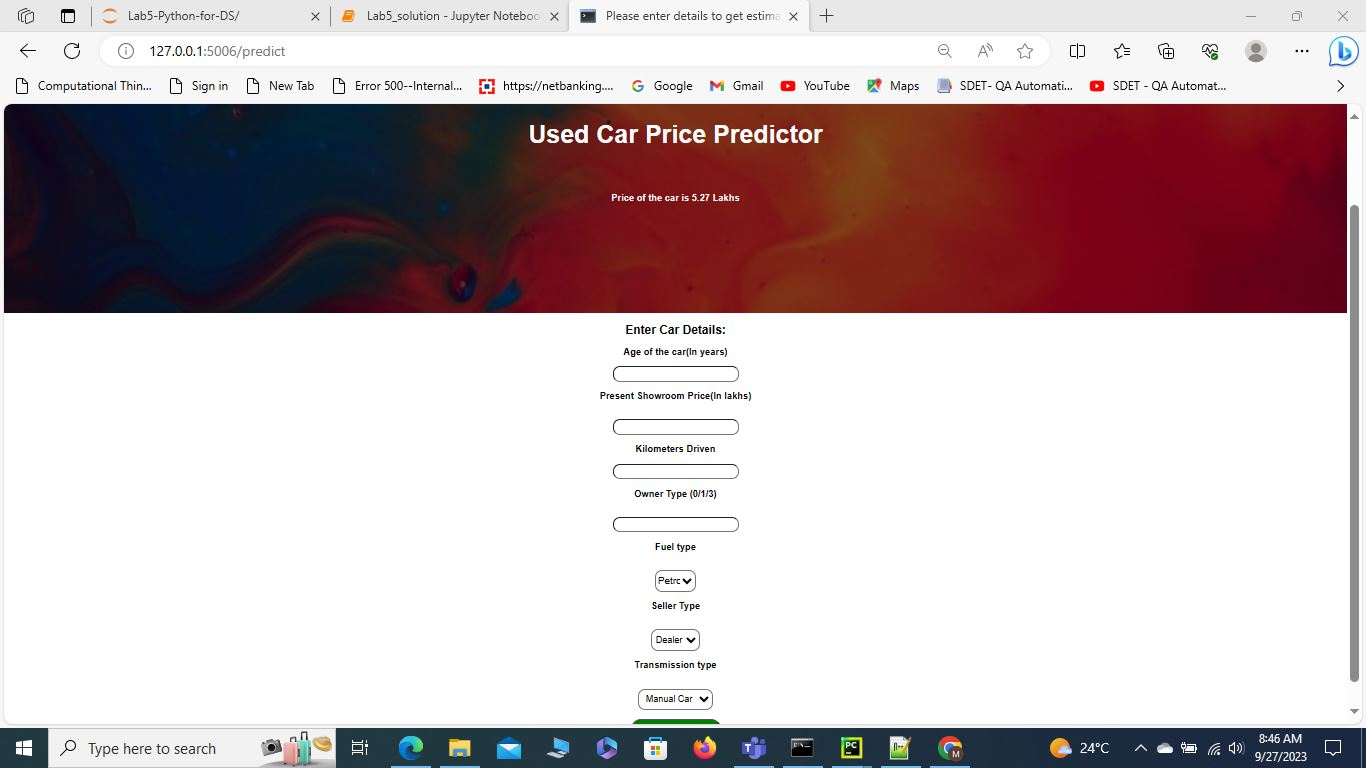

### Happy Learning :)